<a href="https://colab.research.google.com/github/rajat1911996sharma/TensorFlow-Classification/blob/main/DL_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('cancer_classification.csv')

In [3]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

Exploratory Data Analysis

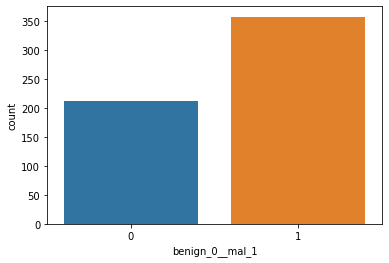

In [6]:
sns.countplot(x='benign_0__mal_1',data=df)

In [7]:
df.corr()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
mean radius,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,0.679090,-0.097317,0.674172,0.735864,-0.222600,0.206000,0.194204,0.376169,-0.104321,-0.042641,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066,-0.730029
mean texture,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,0.275869,0.386358,0.281673,0.259845,0.006614,0.191975,0.143293,0.163851,0.009127,0.054458,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205,-0.415185
mean perimeter,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,0.691765,-0.086761,0.693135,0.744983,-0.202694,0.250744,0.228082,0.407217,-0.081629,-0.005523,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019,-0.742636
mean area,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,0.732562,-0.066280,0.726628,0.800086,-0.166777,0.212583,0.207660,0.372320,-0.072497,-0.019887,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738,-0.708984
mean smoothness,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,0.301467,0.068406,0.296092,0.246552,0.332375,0.318943,0.248396,0.380676,0.200774,0.283607,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316,-0.358560
mean compactness,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,0.497473,0.046205,0.548905,0.455653,0.135299,0.738722,0.570517,0.642262,0.229977,0.507318,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382,-0.596534
mean concavity,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,0.631925,0.076218,0.660391,0.617427,0.098564,0.670279,0.691270,0.683260,0.178009,0.449301,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930,-0.696360
mean concave points,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,0.698050,0.021480,0.710650,0.690299,0.027653,0.490424,0.439167,0.615634,0.095351,0.257584,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661,-0.776614
mean symmetry,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,0.303379,0.128053,0.313893,0.223970,0.187321,0.421659,0.342627,0.393298,0.449137,0.331786,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413,-0.330499
mean fractal dimension,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,0.000111,0.164174,0.039830,-0.090170,0.401964,0.559837,0.446630,0.341198,0.345007,0.688132,-0.253691,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297,0.012838


In [8]:
df.corr()['benign_0__mal_1']

mean radius               -0.730029
mean texture              -0.415185
mean perimeter            -0.742636
mean area                 -0.708984
mean smoothness           -0.358560
mean compactness          -0.596534
mean concavity            -0.696360
mean concave points       -0.776614
mean symmetry             -0.330499
mean fractal dimension     0.012838
radius error              -0.567134
texture error              0.008303
perimeter error           -0.556141
area error                -0.548236
smoothness error           0.067016
compactness error         -0.292999
concavity error           -0.253730
concave points error      -0.408042
symmetry error             0.006522
fractal dimension error   -0.077972
worst radius              -0.776454
worst texture             -0.456903
worst perimeter           -0.782914
worst area                -0.733825
worst smoothness          -0.421465
worst compactness         -0.590998
worst concavity           -0.659610
worst concave points      -0

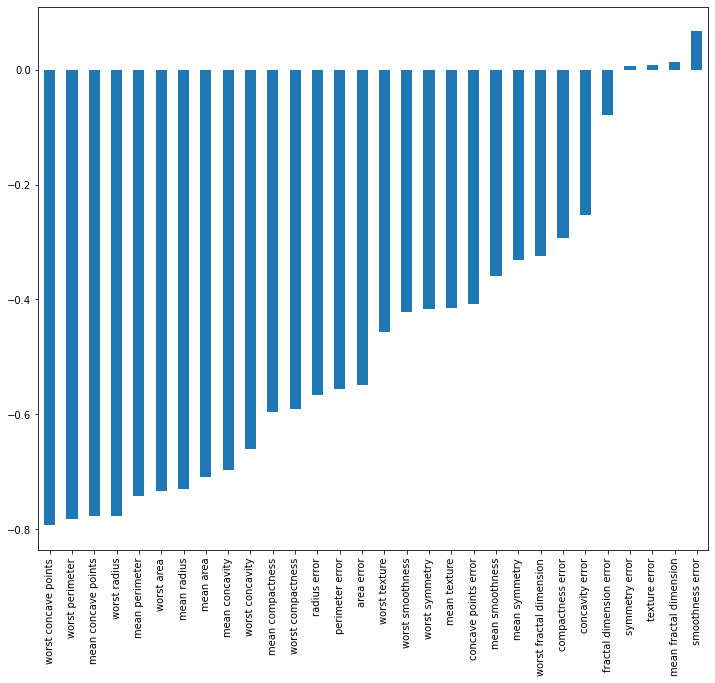

In [13]:
plt.figure(figsize=(12,10))
df.corr()['benign_0__mal_1'][:-1].sort_values().plot(kind='bar')

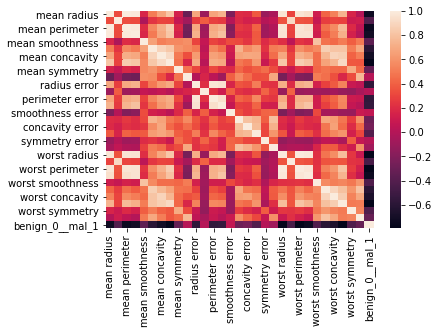

In [14]:
sns.heatmap(df.corr())

In [15]:
X = df.drop('benign_0__mal_1',axis=1).values
y = df['benign_0__mal_1'].values

In [16]:
from sklearn.model_selection import train_test_split


In [18]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=101)

In [19]:
from sklearn.preprocessing import MinMaxScaler

In [20]:
scaler = MinMaxScaler()

In [21]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [24]:
X_train.shape

(398, 30)

In [25]:
model = Sequential()

model.add(Dense(30,activation='relu'))
model.add(Dense(15,activation='relu'))

#it is a binary classification problem
#we will use sigmoid activation function
model.add(Dense(1,activation='relu'))


In [26]:
model.compile(loss='binary_crossentropy',optimizer='adam')

In [27]:
model.fit(x=X_train,y=y_train,epochs=600,validation_data=(X_test,y_test))

Epoch 1/600
13/13 [==============================] - 0s 13ms/step - loss: 2.5095 - val_loss: 1.3036
Epoch 2/600
13/13 [==============================] - 0s 3ms/step - loss: 1.2644 - val_loss: 1.1205
Epoch 3/600
13/13 [==============================] - 0s 3ms/step - loss: 1.1166 - val_loss: 1.0251
Epoch 4/600
13/13 [==============================] - 0s 3ms/step - loss: 1.0222 - val_loss: 0.9458
Epoch 5/600
13/13 [==============================] - 0s 3ms/step - loss: 0.9446 - val_loss: 0.8797
Epoch 6/600
13/13 [==============================] - 0s 3ms/step - loss: 0.8775 - val_loss: 0.8227
Epoch 7/600
13/13 [==============================] - 0s 3ms/step - loss: 0.8147 - val_loss: 0.8332
Epoch 8/600
13/13 [==============================] - 0s 3ms/step - loss: 0.7501 - val_loss: 0.7120
Epoch 9/600
13/13 [==============================] - 0s 3ms/step - loss: 0.6867 - val_loss: 0.7168
Epoch 10/600
13/13 [==============================] - 0s 3ms/step - loss: 0.6262 - val_loss: 0.6509
Epoch 11

In [28]:
model.history.history

{'loss': [2.509453296661377,
  1.264401912689209,
  1.116613745689392,
  1.0221816301345825,
  0.944633960723877,
  0.8775292038917542,
  0.8147427439689636,
  0.7501365542411804,
  0.686729371547699,
  0.6262069940567017,
  0.5532094836235046,
  0.482632577419281,
  0.41722384095191956,
  0.361798495054245,
  0.3193986117839813,
  0.28696301579475403,
  0.25502175092697144,
  0.23143474757671356,
  0.21371284127235413,
  0.19660957157611847,
  0.18376968801021576,
  0.16903144121170044,
  0.16136141121387482,
  0.1488693803548813,
  0.13912516832351685,
  0.13329267501831055,
  0.12307880818843842,
  0.11679288744926453,
  0.1125124916434288,
  0.10476983338594437,
  0.09885259717702866,
  0.09508396685123444,
  0.08962762355804443,
  0.08557771146297455,
  0.08230098336935043,
  0.08070269972085953,
  0.07812865078449249,
  0.07442297041416168,
  0.07206898182630539,
  0.06935428082942963,
  0.06737340986728668,
  0.06544829905033112,
  0.06725243479013443,
  0.06333087384700775,
  0

<Figure size 864x720 with 0 Axes>

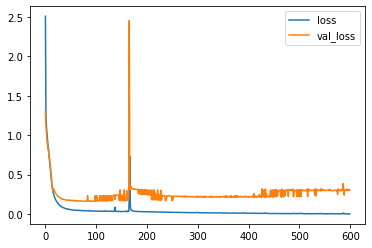

In [32]:

losses = pd.DataFrame(model.history.history)
losses.plot()

Overfitting is observed

In [33]:

model = Sequential()

model.add(Dense(30,activation='relu'))
model.add(Dense(15,activation='relu'))

#it is a binary classification problem
#we will use sigmoid activation function
model.add(Dense(1,activation='relu'))
model.compile(loss='binary_crossentropy',optimizer='adam')

we will use callbacks for early stopping because we are training for too many epochs

In [34]:
from tensorflow.keras.callbacks import EarlyStopping

In [36]:
#help(EarlyStopping)

In [37]:
early_stop = EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=25)

we are going to monitor our val_loss
mode is going to to minimize the val_loss
verbose so that we call have a report back
patince 25 we will wait for 25 epochs after early stopping

In [38]:
model.fit(x=X_train,y=y_train,epochs=600,validation_data=(X_test,y_test),
          callbacks=[early_stop])

Epoch 1/600
13/13 [==============================] - 0s 11ms/step - loss: 6.3942 - val_loss: 1.7201
Epoch 2/600
13/13 [==============================] - 0s 3ms/step - loss: 1.3429 - val_loss: 1.1096
Epoch 3/600
13/13 [==============================] - 0s 3ms/step - loss: 1.1044 - val_loss: 1.0327
Epoch 4/600
13/13 [==============================] - 0s 3ms/step - loss: 1.0436 - val_loss: 0.9876
Epoch 5/600
13/13 [==============================] - 0s 3ms/step - loss: 0.9847 - val_loss: 0.9414
Epoch 6/600
13/13 [==============================] - 0s 3ms/step - loss: 0.9346 - val_loss: 0.8956
Epoch 7/600
13/13 [==============================] - 0s 3ms/step - loss: 0.8806 - val_loss: 0.8437
Epoch 8/600
13/13 [==============================] - 0s 3ms/step - loss: 0.8227 - val_loss: 0.7843
Epoch 9/600
13/13 [==============================] - 0s 3ms/step - loss: 0.7557 - val_loss: 0.7931
Epoch 10/600
13/13 [==============================] - 0s 3ms/step - loss: 0.6944 - val_loss: 0.7371
Epoch 11

call back parameter used when early_stop is trigerred 


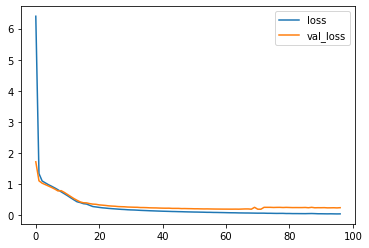

In [39]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

It seems way more feasible now

In [40]:
#we can also add in drop out layers to prevent overfitting
from tensorflow.keras.layers import Dropout

In [41]:
model = Sequential()

model.add(Dense(30,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(15,activation='relu'))
model.add(Dropout(0.5))
#it is a binary classification problem
#we will use sigmoid activation function
model.add(Dense(1,activation='relu'))
model.compile(loss='binary_crossentropy',optimizer='adam')

model.add(Dropout(0))
means 0% of neurons are turned off for computing
Dropout(1) would mean 100% are turned off

In [42]:
model.fit(x=X_train,y=y_train,epochs=600,validation_data=(X_test,y_test),
          callbacks=[early_stop])

Epoch 1/600
13/13 [==============================] - 0s 10ms/step - loss: 5.2965 - val_loss: 1.5732
Epoch 2/600
13/13 [==============================] - 0s 3ms/step - loss: 4.5001 - val_loss: 1.0933
Epoch 3/600
13/13 [==============================] - 0s 3ms/step - loss: 3.6493 - val_loss: 0.9137
Epoch 4/600
13/13 [==============================] - 0s 3ms/step - loss: 3.3202 - val_loss: 0.8629
Epoch 5/600
13/13 [==============================] - 0s 3ms/step - loss: 2.7731 - val_loss: 0.8698
Epoch 6/600
13/13 [==============================] - 0s 3ms/step - loss: 2.8458 - val_loss: 0.8803
Epoch 7/600
13/13 [==============================] - 0s 3ms/step - loss: 2.1815 - val_loss: 0.8820
Epoch 8/600
13/13 [==============================] - 0s 3ms/step - loss: 2.0468 - val_loss: 0.8605
Epoch 9/600
13/13 [==============================] - 0s 3ms/step - loss: 1.8032 - val_loss: 0.7971
Epoch 10/600
13/13 [==============================] - 0s 3ms/step - loss: 1.6405 - val_loss: 0.7512
Epoch 11

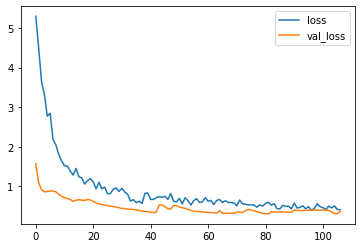

In [43]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

This is much improved and what we want to see as both are flattening at a similar rate


In [49]:
predictions  = model.predict_classes(X_test)
#shows which classes predict as a 0/1 

In [46]:
from sklearn.metrics import classification_report,confusion_matrix

In [50]:
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           0       0.76      0.95      0.85        66
           1       0.97      0.81      0.88       105

    accuracy                           0.87       171
   macro avg       0.86      0.88      0.86       171
weighted avg       0.89      0.87      0.87       171

[[63  3]
 [20 85]]


We are getting a decent performance